#  Simple notebook to run fashion MNIST on TensorFlow 1.X.

## How to start Session


First, click the `Sessions` menu  in the navigation bar on the left. Click the `Start` button in the upper right corner to create a new session.

<div>
<img src="https://user-images.githubusercontent.com/42667951/93175878-54884700-f76b-11ea-928f-d86a92cc5509.png" width=700></div>

Then you will see the following screen: Select **TensorFlow** for `Environments` and **1.15/ Python 3.6 / CUDA10** for `Version`. After that click `LAUNCH`

<div>
<img src="https://user-images.githubusercontent.com/42667951/93179383-91a30800-f770-11ea-88cd-9b2148ae2648.png" width=300></div>

If you launch the session, you can see this screen. Click `Jupyter Notebook`.
<div>
<img src="https://user-images.githubusercontent.com/42667951/93179627-e6468300-f770-11ea-8d55-455bc8c106e0.png" width=700></div>


Now, you can use Jupyter Notebook. You can create a new notebook in the `Tensorflow 1.15.3 on Python 3.6 (CUDA 10.0)` environment.

## fasion MNIST code
This is a simple fasion MNIST code example.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

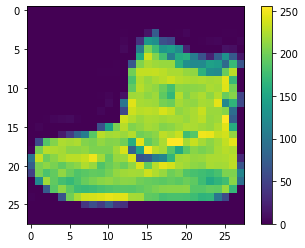

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

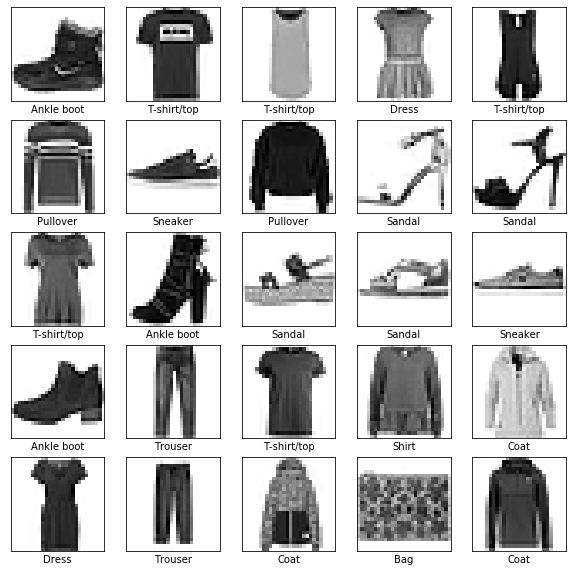

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5038 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3768 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3352 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3136 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2969 - acc: 0.8903


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

 - 0s - loss: 0.3523 - acc: 0.8759

테스트 정확도: 0.8759


In [16]:
predictions = model.predict(test_images)
predictions[0]

array([3.2684131e-06, 1.4897198e-07, 1.3565152e-07, 6.4311814e-07,
       1.1241173e-06, 2.0456117e-02, 1.7469181e-06, 2.0909908e-03,
       2.7895006e-05, 9.7741801e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

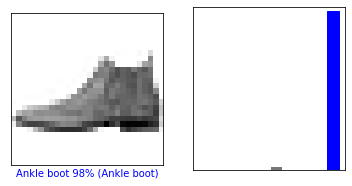

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

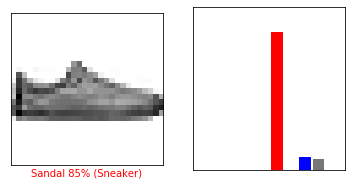

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

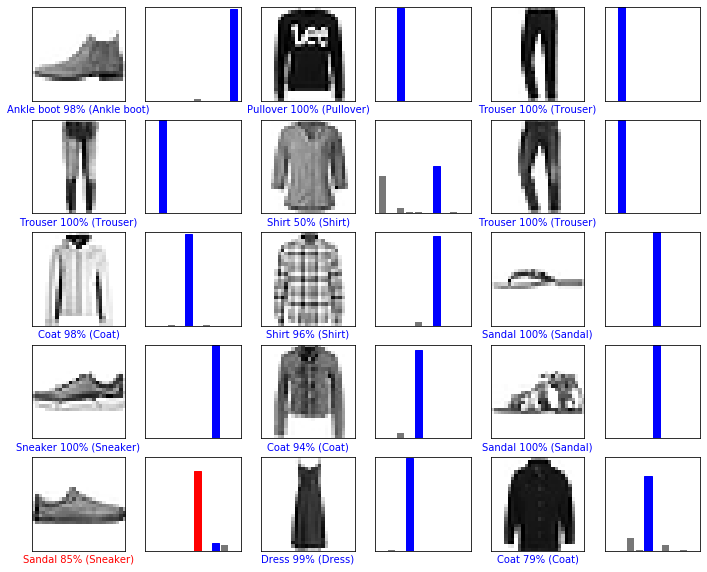

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [23]:
img = test_images[0]

print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2684163e-06 1.4897198e-07 1.3565140e-07 6.4311934e-07 1.1241204e-06
  2.0456117e-02 1.7469198e-06 2.0909898e-03 2.7895006e-05 9.7741801e-01]]


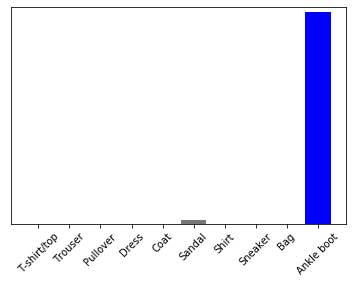

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

9